In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
stroke_df=pd.read_csv('Resources/healthcare-dataset-stroke-data.csv')

In [3]:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
#round glucose level column to 1 decimal place
stroke_df['avg_glucose_level'] = stroke_df['avg_glucose_level'].round(1)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.2,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1


In [5]:
# look at dtypes
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
#look at ID count and compare later
stroke_df['id'].count()

5110

In [7]:
#drop any null values from dataset
stroke_df.dropna(how='any', axis=0, inplace=True)
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.2,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.1,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.4,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.6,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.4,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.5,36.8,smokes,1


In [8]:
# double check for null values
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#get rid of any duplicates
stroke_df.drop_duplicates(subset= 'id', keep='first', inplace=True)


In [10]:
#look at unique values 
stroke_df.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    1305
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
stroke_df['id'].count()
# removed 201 rows by dropping duplicates and NaN values

4909

<function matplotlib.pyplot.show(close=None, block=None)>

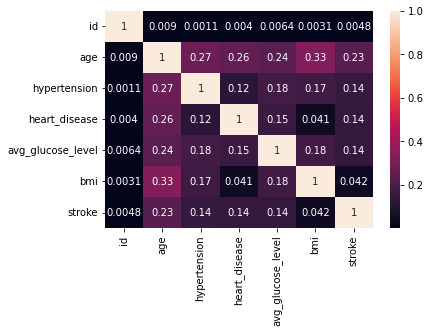

In [12]:
#try to make a correlation matrix to see of variables interact with eachother 
corrMatrix = stroke_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show

In [13]:
# make new dataframe and remove ID column and then make a new correlation matrix 
corr_df = stroke_df.drop('id', axis=1) 
corr_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.2,29.0,formerly smoked,1


<function matplotlib.pyplot.show(close=None, block=None)>

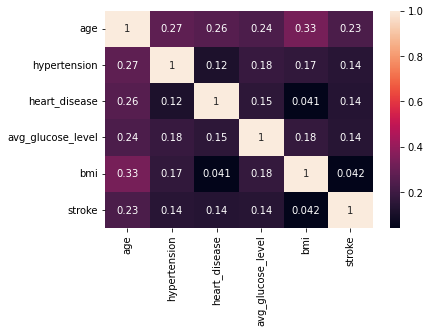

In [14]:
corrMatrix2 = corr_df.corr()
sn.heatmap(corrMatrix2, annot=True)
plt.show

Try data preprocessing for ML model 

In [15]:
#data frame for integer values
int_df = corr_df.drop(columns=["ever_married", "work_type", "Residence_type"])
int_df.head(10)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.7,36.6,formerly smoked,1
2,Male,80.0,0,1,105.9,32.5,never smoked,1
3,Female,49.0,0,0,171.2,34.4,smokes,1
4,Female,79.0,1,0,174.1,24.0,never smoked,1
5,Male,81.0,0,0,186.2,29.0,formerly smoked,1
6,Male,74.0,1,1,70.1,27.4,never smoked,1
7,Female,69.0,0,0,94.4,22.8,never smoked,1
9,Female,78.0,0,0,58.6,24.2,Unknown,1
10,Female,81.0,1,0,80.4,29.7,never smoked,1
11,Female,61.0,0,1,120.5,36.8,smokes,1


Don't feel comfortable binning age 

In [16]:
# look at types on more time before encoding 
int_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
enc = preprocessing.LabelEncoder()
corr_df["gender"] = enc.fit_transform(corr_df["gender"])
corr_df["ever_married"] = enc.fit_transform(corr_df["ever_married"])
corr_df["Residence_type"] = enc.fit_transform(corr_df["Residence_type"])

# multiple options for work and smoking status, use get dummies
corr_df=pd.get_dummies(corr_df)

In [18]:
# Split our preprocessed data into our features and target arrays
y = corr_df.loc[:, "stroke"].values
X = corr_df.drop(columns=["stroke"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                432       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


2022-07-27 12:10:33.903397: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#train the model
fit_model = nn.fit(X_train, y_train, epochs=200)

Epoch 1/200
116/116 [==============================] - 1s 1ms/step - loss: 0.8777 - accuracy: 0.0397
Epoch 2/200
116/116 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.7281
Epoch 3/200
116/116 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.9603
Epoch 4/200
116/116 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.9603
Epoch 5/200
116/116 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.9603
Epoch 6/200
116/116 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.9603
Epoch 7/200
116/116 [==============================] - 0s 1ms/step - loss: 0.2288 - accuracy: 0.9603
Epoch 8/200
116/116 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.9603
Epoch 9/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1910 - accuracy: 0.9603
Epoch 10/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1812 - accura

116/116 [==============================] - 0s 1ms/step - loss: 0.1382 - accuracy: 0.9603
Epoch 82/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.9603
Epoch 83/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.9603
Epoch 84/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.9603
Epoch 85/200
116/116 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9603
Epoch 86/200
116/116 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9603
Epoch 87/200
116/116 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9603
Epoch 88/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9603
Epoch 89/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9603
Epoch 90/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 

116/116 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.9603
Epoch 161/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9603
Epoch 162/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.9603
Epoch 163/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9603
Epoch 164/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9603
Epoch 165/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9603
Epoch 166/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.9603
Epoch 167/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9603
Epoch 168/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9603
Epoch 169/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1307 - a

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# try random forest 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_preds)
print(f"Accuracy: , {accuracy}, Loss: {model_loss}")

In [ ]:
#encoders for int_df
enc = preprocessing.LabelEncoder()
int_df["gender"] = enc.fit_transform(int_df["gender"])

# multiple options for work and smoking status, use get dummies
int_df=pd.get_dummies(int_df)

int_df.head(10)

In [ ]:
# Split our preprocessed data into our features and target arrays
y = int_df.loc[:, "stroke"].values
X = int_df.drop(columns=["stroke"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12
#hidden_nodes_layer3 = 6


nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
#nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

In [ ]:
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
fit_model = nn2.fit(X_train, y_train, epochs=200)

In [ ]:
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")